# Plots of lichen data and the ELF isolated from them
This Notebook plots descriptive data about the New Zealand lichen collection at Victoria University of Wellington and the taxonomy of endolichenic fungi (ELF) isolates that were recovered from a subset of these lichens.

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("../ELF_master_results.csv")
df2 = df[["isolate_genus", "isolate_class", "Host_Genus", "Host_ID"]]
df2 = df2.fillna("unidentified")
df2 = df2[df2["Host_Genus"] != 0]
df2.head()

,isolate_genus,isolate_class,Host_Genus,Host_ID
0,Anthostomelloides,Sordariomycetes,Crocodia,436
1,Penicillium,Eurotiomycetes,Parmotrema,381
2,Anthostomelloides,Sordariomycetes,Menegazzia,447
3,Amphirosellinia,Sordariomycetes,Sphaerophorus,435
4,Amphirosellinia,Sordariomycetes,Menegazzia,447


In [5]:
dfa = df2.groupby(['isolate_genus','Host_Genus']).size().reset_index()
dfb = dfa.pivot(index='isolate_genus', columns='Host_Genus', values=0).fillna(0)
dfb.to_csv('lichen_contingency.csv')
dfb

Host_Genus,Bunodophoron,Cladia,Cladonia,Coccotrema,Coenogonium,Crocodia,Leptogium,Menegazzia,Nephroma,Parmotrema,...,Ramalina,Siphula,Sphaerophorus,Stereocaulon,Sticta,Teloschistes,Usnea,Xanthoparmelia,Yarrumia,unidentified
isolate_genus,,,,,,,,,,,,,,,,,,,,,
Absidia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amphirosellinia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0
Anthostomelloides,0.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
Antrelloides,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ascochyta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trichonectria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Umbelopsis,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xylaria,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:
dfb = dfb.fillna(0)
dfb.loc['Column_Total']= dfb.sum(numeric_only=True, axis=0)
dfb = dfb.T
dfb = dfb.sort_values(by="Column_Total",ascending=False)
dfb = dfb.T.drop("Column_Total")
display(dfb)
df5 = dfb.T
df5.to_csv("lichen_isolates.csv")

Host_Genus,Pseudocyphellaria,Parmotrema,Stereocaulon,Yarrumia,Peltigera,Usnea,Leptogium,Teloschistes,Podostictina,Coccotrema,...,Siphula,Bunodophoron,Menegazzia,Coenogonium,Xanthoparmelia,unidentified,Nephroma,Sphaerophorus,Ramalina,Cladonia
isolate_genus,,,,,,,,,,,,,,,,,,,,,
Absidia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amphirosellinia,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Anthostomelloides,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
Antrelloides,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ascochyta,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trichonectria,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Umbelopsis,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xylaria,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
prevalent_cols = dfb.sum().index
color_map = dict(zip(prevalent_cols, sns.color_palette()[:len(prevalent_cols)]))
column_sum=dfb.sum(axis=0).reset_index().sort_values(by=[0],ascending=False)

The following plot is edited using an SVG editor to align the top barplot with the rows of the heat matrix. The top-left empty subplot is also removed.

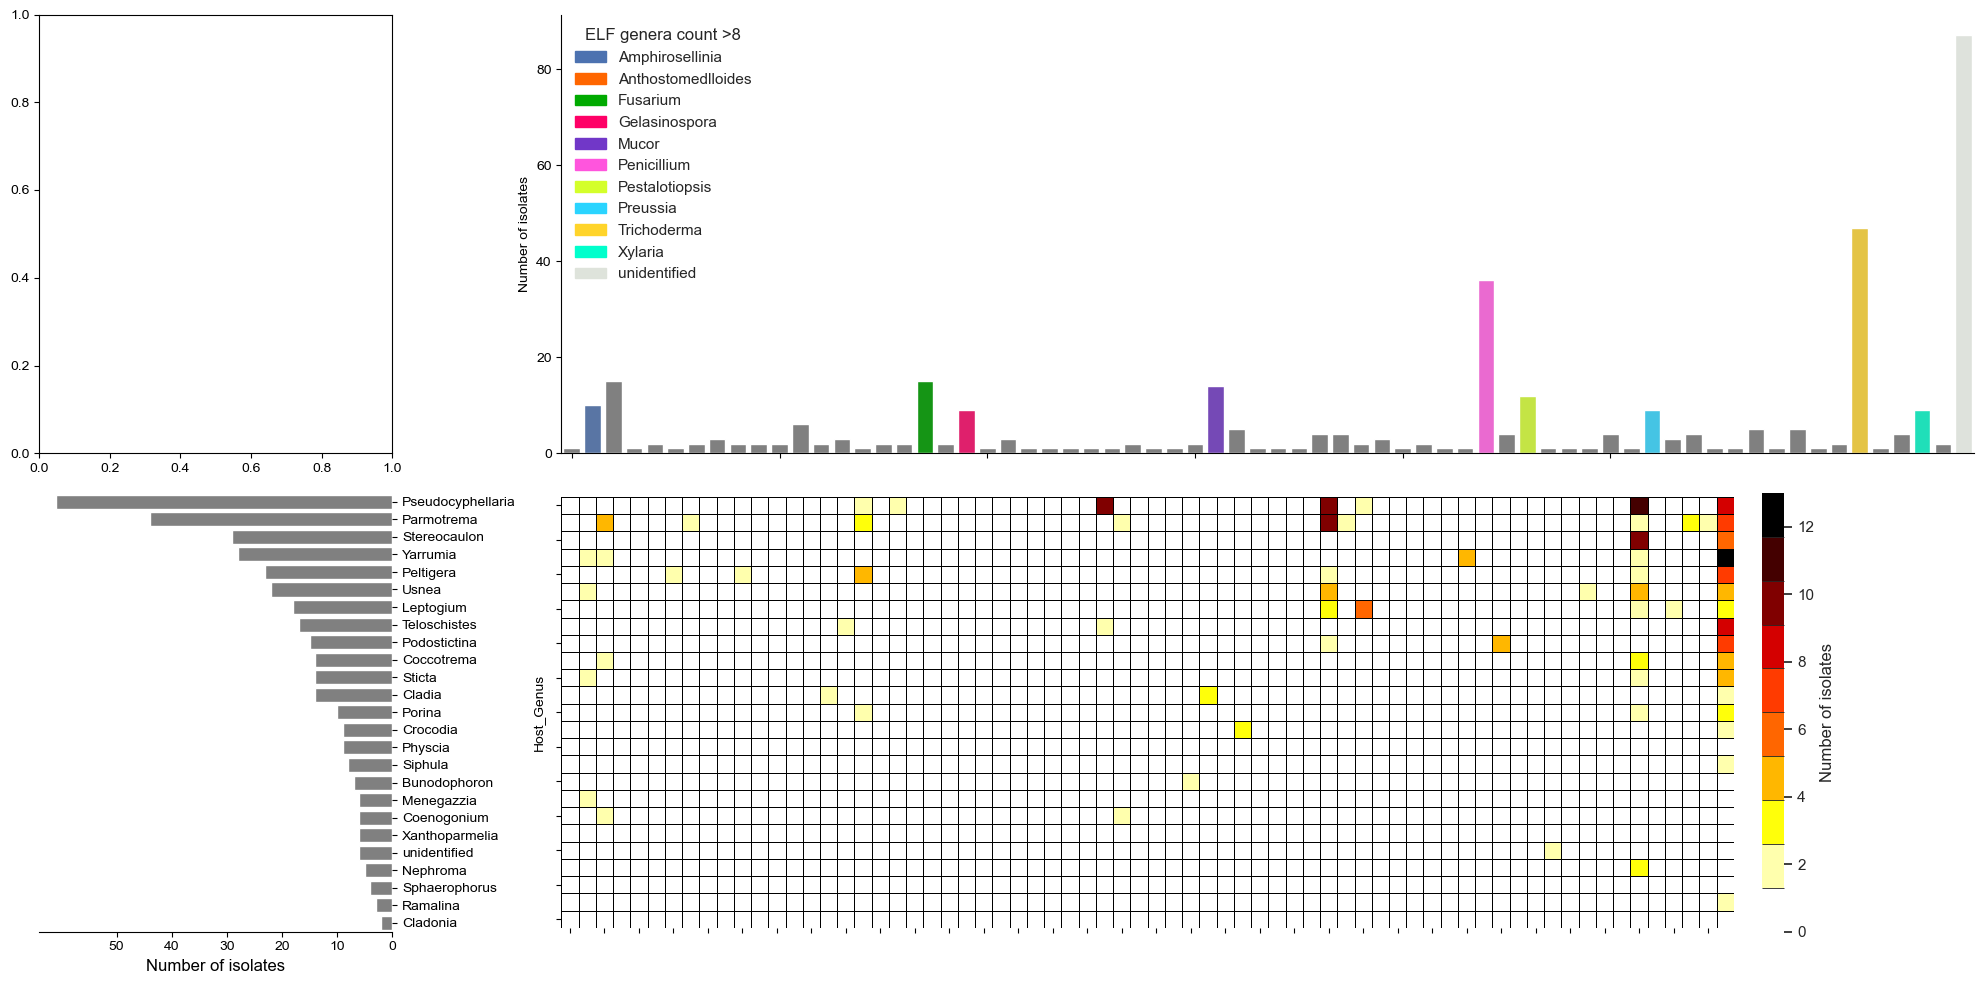

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [.2, .8]})

sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme("notebook")
sns.set_style("white")

ax1 = sns.barplot(data=column_sum, y=column_sum["Host_Genus"], x=column_sum[0],color='grey', ax=axes[1,0])
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.set_xlabel('Number of isolates',fontsize=12)
ax1.set(ylabel=None)
sns.despine(left=True, ax=ax1)
ax1.set(xticks=[0,10,20,30,40,50])

colors1 = {'Amphirosellinia':'#4c72b0ff', 'Anthostomedlloides':'#ff6600ff', 'Fusarium':'#00aa00ff', 'Gelasinospora':'#ff0066ff', 'Mucor':'#7137c8ff', 'Penicillium':'#ff55ddff', 'Pestalotiopsis':'#d4ff2aff', 'Preussia':'#2ad4ffff', 'Trichoderma':'#ffd42aff', 'Xylaria':'#00ffccff', 'unidentified': '#dee3dbff'}         
colors2 = colors1.copy()
for i in dfb.index:
    if i not in colors2:
        colors2[i] = "grey"
labels = list(colors1.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors1[label]) for label in labels]
ax2 = sns.barplot(x=dfb.index, y=dfb.sum(axis=1), palette=colors2, ax=axes[0,1])
ax2.set_xticklabels(labels=dfb.index, rotation=90, fontstyle='italic')
ax2.set(xticklabels=[])  
ax2.set(xlabel=None)
ax2.set_xticks([0, 10, 20, 30, 40, 50])
ax2.set(ylabel="Number of isolates")
ax2.legend(handles, labels, title="ELF genera count >8", frameon=False)
sns.despine(right=True, ax=ax2)

colours=["#FFFFFF", "#ffffad", "#ffff0a", "#ffb700", "#ff6600", "#ff3b00", "#d40000", "#800000", "#440000", "#000000"]
ax3 = sns.heatmap(dfb.T, square=True, cmap=colours, linecolor="black", linewidths=.5, \
                  cbar_kws={'drawedges':True, 'pad':0.02, 'label': 'Number of isolates', "shrink": 1})
ax3.set(xticklabels=[])
ax3.set(yticklabels=[])
#ax3.set_xticks(labels=x_labels, rotation=45, ticks=x_labels)
ax3.set(xlabel=None)
fig.tight_layout()
plt.savefig("complete_plot.svg", format="svg", bbox_inches='tight')
plt.show()

## Plot of ELF by class
The below plot was altered in an SVG editor by combining with the Common Tree for the Classes as defined at https://www.ncbi.nlm.nih.gov/guide/howto/gen-com-tree/.  

In [9]:
df = pd.read_csv("fungal_class_counts.csv")
df

,isolate_class,count,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Sordariomycetes,147,43.491124,NaN,Basidiomyocta,2.366864
1,Mucoromycetes,14,4.142012,NaN,Mucoromycota,5.325444
2,unidentified,80,23.668639,NaN,Ascomycota,68.639053
3,Agaricomycetes,6,1.775148,NaN,NaN,NaN
4,Eurotiomycetes,36,10.650888,NaN,NaN,NaN
5,Dothideomycetes,31,9.171598,NaN,NaN,NaN
6,Pezizomycetes,13,3.846154,NaN,NaN,NaN
7,Umbelopsidomycetes,4,1.183432,NaN,NaN,NaN
8,Tremellomycetes,2,0.591716,NaN,NaN,NaN
9,Leotiomycetes,4,1.183432,NaN,NaN,NaN


['tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:red']


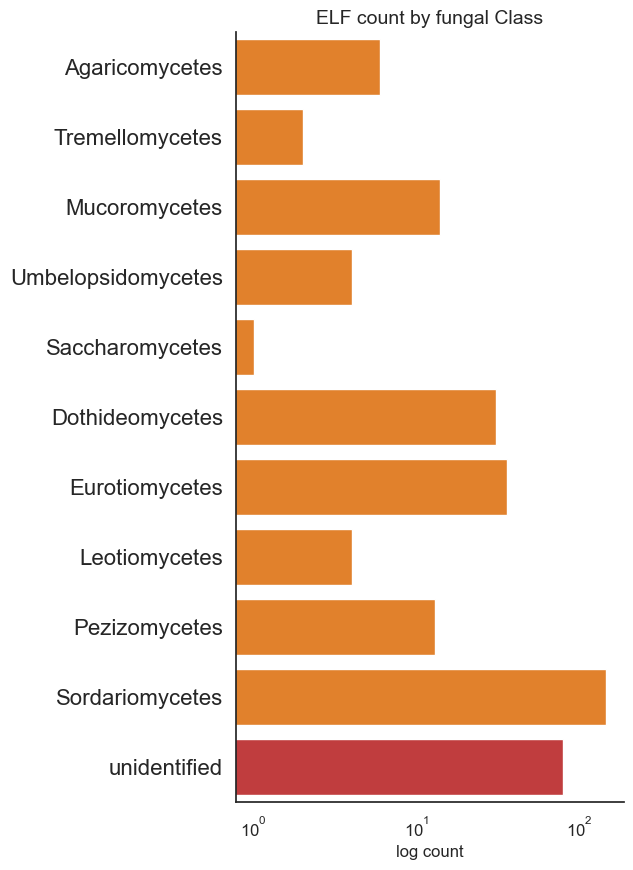

In [10]:
sns.set(rc={'figure.figsize':(5,10)})
sns.set_theme("notebook")
sns.set_style("white")
class_order = ["Agaricomycetes", "Tremellomycetes", "Mucoromycetes", "Umbelopsidomycetes", "Saccharomycetes", \
              "Dothideomycetes", "Eurotiomycetes", "Leotiomycetes", "Pezizomycetes", "Sordariomycetes", "unidentified"]
colours = ['tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:red']
print(colours)
ax = sns.barplot(data=df, x="count", y="isolate_class", order=class_order, palette=colours)
plt.xscale('log')
sns.despine(right=True)
ax.set(xlabel='log count', ylabel='')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=12)
ax.set_title('ELF count by fungal Class', fontsize=14)
plt.savefig("ELF_count_fungal_Class.svg", format="svg")

### Geographical map

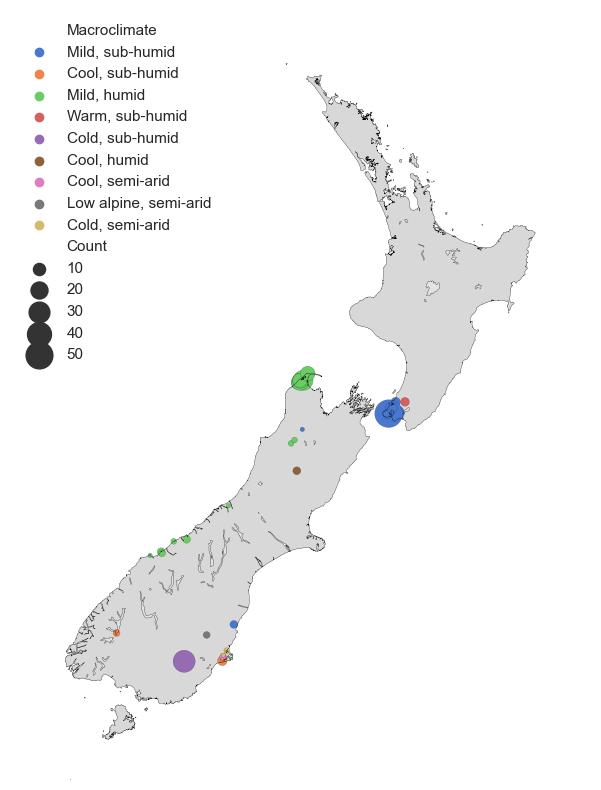

In [13]:
map_df = pd.read_csv("lichen_collection_locations.csv")

# Set the dimension of the figure
plt.rcParams["figure.figsize"]=15,10;

# Make the background map
m=Basemap(llcrnrlon=165, llcrnrlat=-48, urcrnrlon=180, urcrnrlat=-33, projection='merc', resolution="l");
m.drawmapboundary(fill_color='#FFFFFF', linewidth=0);
m.fillcontinents(color='grey', alpha=0.3);
m.drawcoastlines(linewidth=0.2, color="black");

xpt,ypt = m(170.477721,-45.901944) # order of lat,long important
#m.plot(xpt,ypt,'bo') 
# transforms long, lat data to fit map projection
map_df["long"], map_df["lat"] = m(map_df["Longitude"], map_df["Latitude"])
map_df["size"] = map_df["Count"]*100
# Add a point per position
ax = sns.scatterplot(data=map_df,
    x="long", 
    y="lat", 
    size='Count',
    sizes=(10,400),
    palette="muted",
    hue='Macroclimate',
    edgecolor='black',
    linewidth=0.1
)

plt.legend(frameon=False)
legend = plt.legend()
legend.get_frame().set_linewidth(0.0)
frame = legend.get_frame()
frame.set_facecolor('#FFFFFF')

plt.savefig("lichen_collection_map.svg")

## Plots of lichen descriptive data

In [15]:
lichen_df = pd.read_csv("lichen_dataset.csv")
lichen_df2 = lichen_df.dropna(subset=['Growth'])
lichen_df2['Photobiont'] = lichen_df2['Photobiont'].replace('Tri', 'Tripartite')
print(f"Number of total lichens: {len(lichen_df)}\nNumber of investigated lichens: {len(lichen_df2)}")
display(lichen_df2)

Number of total lichens: 399
Number of investigated lichens: 246


C:\Users\styleske\AppData\Local\Temp\ipykernel_11996\3819098105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lichen_df2['Photobiont'] = lichen_df2['Photobiont'].replace('Tri', 'Tripartite')


,Lichen,Collection location,Class,Order,Family,Genus,Species,Photobiont,Growth,Macroclimate
13,23,Wellington,Lecanoromycetes,Peltigerales,Lobariaceae,Yarrumia,colensoi,Green,Foliose,"Mild, sub-humid"
25,102,Wellington,Lecanoromycetes,Lecanorales,Collemataceae,Collema,sp.,Cyano,Foliose,"Mild, sub-humid"
29,106,Wellington,Lecanoromycetes,Lecanorales,Collemataceae,Leptogium,coralloideum,Cyano,Foliose,"Mild, sub-humid"
32,109,Wellington,Lecanoromycetes,Lecanorales,Collemataceae,Leptogium,coralloideum,Cyano,Foliose,"Mild, sub-humid"
33,110,Wellington,Lecanoromycetes,Lecanorales,Collemataceae,Collema,sp.,Cyano,Foliose,"Mild, sub-humid"
...,...,...,...,...,...,...,...,...,...,...
394,472,Wainuiomata water reserve,Lecanoromycetes,Lecanorales,Stereocaulaceae,Stereocaulon,ramulosum,Tripartite,Fruticose,"Mild, sub-humid"
395,473,Wainuiomata water reserve,Lecanoromycetes,Peltigerales,Peltigeraceae,Peltigera,polydactylon,Cyano,Foliose,"Mild, sub-humid"
396,474,Wainuiomata water reserve,Lecanoromycetes,Peltigerales,Lobariaceae,Pseudocyphellaria,dissimilis,Cyano,Foliose,"Mild, sub-humid"
397,475,Wainuiomata water reserve,Lecanoromycetes,Peltigerales,Lobariaceae,Pseudocyphellaria,dissimilis,Cyano,Foliose,"Mild, sub-humid"


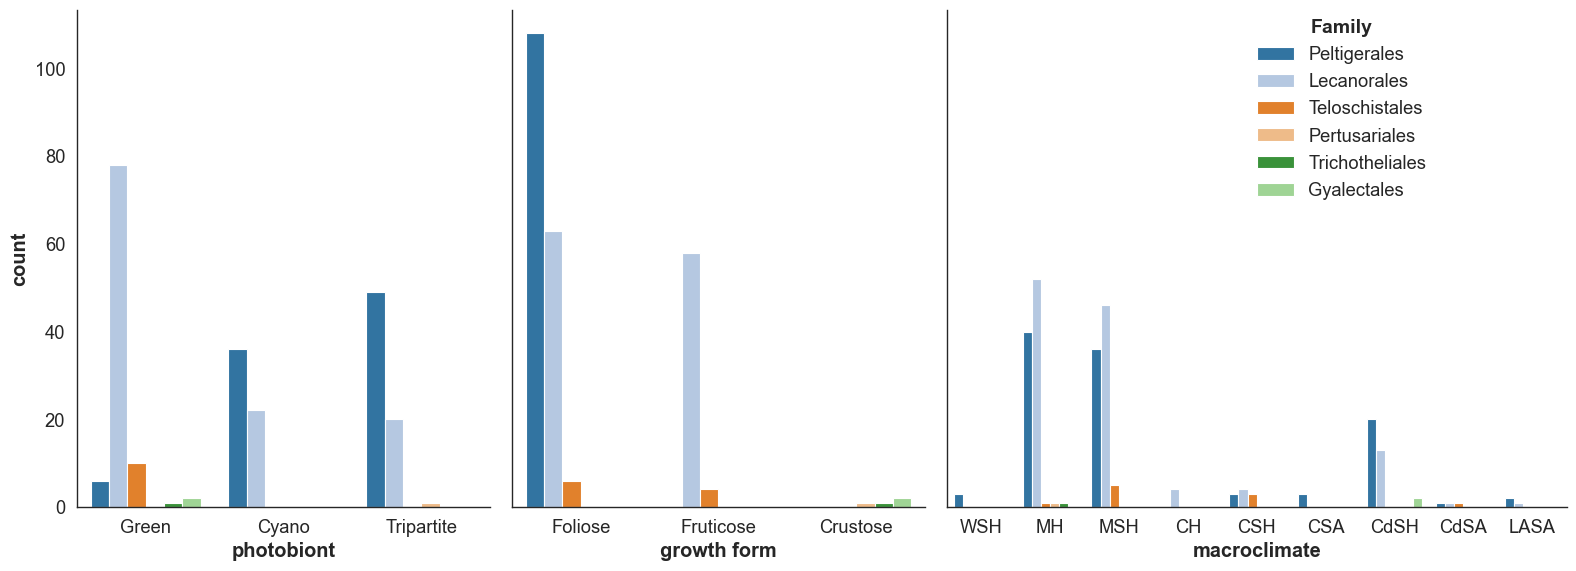

In [17]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5)
fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey=True, gridspec_kw={'width_ratios': [1, 1, 1.5]})

# ax1
ax1 = sns.countplot(data=lichen_df2, x="Photobiont", hue="Order", palette="tab20", ax=axes[0])
sns.despine(ax=ax1)
ax1.get_legend().remove()
ax1.set_ylabel('count', weight="bold")
ax1.set_xlabel('photobiont', weight="bold")

# ax2
ax2 = sns.countplot(data=lichen_df2, x="Growth", hue="Order", palette="tab20", ax=axes[1])
sns.despine(ax=ax2)
ax2.get_legend().remove()
ax2.set_ylabel('')
ax2.set_xlabel('growth form', weight="bold")

# ax3
climate_order = ["Warm, sub-humid", "Mild, humid", "Mild, sub-humid", "Cool, humid", "Cool, sub-humid", "Cool, semi-arid", "Cold, sub-humid", "Cold, semi-arid", "Low alpine, semi-arid"]
ax3 = sns.countplot(data=lichen_df2, x="Macroclimate", hue="Order", palette="tab20", order=climate_order, ax=axes[2])
sns.move_legend(ax3, "center right", bbox_to_anchor=(0.8, 0.8), frameon=False, title="Family", title_fontproperties={'weight':'bold'}, title_fontsize=14)
sns.despine(ax=ax3)
ax3.set_xticklabels(labels = ['WSH', 'MH', 'MSH', 'CH', 'CSH', 'CSA', 'CdSH', 'CdSA', 'LASA'])
ax3.set_ylabel('')
ax3.set_xlabel('macroclimate', weight="bold")
fig.tight_layout()
plt.savefig("lichen_characteristics.svg", format="svg", bbox_inches='tight')
plt.savefig("lichen_characteristics.png", format="png", bbox_inches='tight')

## Sankey plot of collected lichen samples
The Sankey plot generated below was manually coloured using an SVG editor, using relationships defined on [NCBI Taxonomy](https://www.ncbi.nlm.nih.gov/taxonomy/).

To prepare a Sankey diagram with plotly.go, you need to have three sorted lists where each index is a specific link:
1. a source list - the start node of each link
2. a target list - the end node of each link
3. a value list - the size of each link

The links in the resulting plot can be moved to better display them before being exported manually.

In [18]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Lecanoromycetes\n241", \
               "Peltigerales\n107", "Lecanorales\n120", "Teloschistales\n10", "Pertusariales\n1", "Trichotheliales\n1", "Gyalectales\n2", \
               "Lobariaceae\n88", "Collemataceae\n22", "Parmeliaceae\n44", "Teloschistaceae\n10", "Physciaceae\n3", "Stereocaulaceae\n16", "Cladoniaceae\n17", "Ramalinaceae\n5", "Peltigeraceae\n17", "Sphaerophoraceae\n6", "Coccotremataceae\n1", "Icmadophilaceae\n2", "Pannariaceae\n4", "Trichotheliaceae\n1", "Parmeliaceae\n1", "Gyalectaceae\n2", "Nephromataceae\n2", \
              "Yarrumia\n8", "Collema\n7", "Leptogium\n5", "Pseudocyphellaria\n58", "Parmotrema\n18", "Xanthoria\n6", "Physcia\n2", "Stereocaulon\n16", "Cladonia\n13", "Ramalina\n5", "Usnea\n12", "Heterodermia\n1", "Teloschistes\n4", "Hypogymnia\n1", "Peltigera\n17", "Sticta\n14", "Flavoparmelia\n2", "Lobaria\n3", "Cladia\n3", "Podostictina\n4", "Bunodophoron\n4", "Coccotrema\n1", "Siphula\n2", "Leifidium\n1", "Neophyllis\n1", "Pannaria/Psoroma\n1", "Collema/Leptogium\n10", "Porina\n1", "Crocodia\n2", "Menegazzia\n3", "Pannaria\n3", "Cetraria\n1", "Xanthoparmelia\n6", "Sphaerophorus\n1", "Notoparmelia\n2", "Punctelia\n1", "Coenogonium\n2", "Nephroma\n2", \
              "unidentified\n156", "unidentified\n156", "lichens\n399"],
      color = "black"),
    link = dict(
      source = [64, 64, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 11, 11, 12, 13, 13, 13, 14, 15, 16, 16, 16, 17, 18, 19, 19, 20, 21, 22, 23],
      target = [0, 62, 1, 2, 3, 4, 5, 6, 7, 15, 23, 8, 9, 11, 12, 13, 14, 16, 18, 19, 21, 10, 17, 20, 22, 24, 27, 39, 41, 43, 52, 25, 26, 50, 28, 34, 37, 40, 53, 55, 56, 58, 59, 29, 30, 35, 31, 32, 42, 48, 33, 38, 44, 47, 57, 45, 46, 49, 54, 51, 37, 60, 61],
      value = [241, 158, 107,120,10,1,1,2,88,17,2,22,44,3,16,17,5,6,2,4,1,10,1,1,2,8,57,14,3,4,2,7,5,10,17,12,1,2,3,1,6,2,1,6,2,1,16,13,3,1,5,17,4,1,1,1,2,1,3,1,1,2,2, 158])
    )])

fig.update_layout(title_text="Sampled lichen taxonomy", font_size=10)
fig.show()
fig.write_image("lichen_taxonomy_sankey.svg")

In [3]:
df

,Assembly,estimated_coverage,# contigs (>= 0 bp),# contigs (>= 1000 bp),# contigs (>= 5000 bp),# contigs (>= 10000 bp),# contigs (>= 25000 bp),# contigs (>= 50000 bp),Total length (>= 0 bp),Total length (>= 1000 bp),...,Host_ID,Host_location,Host_Class,Host_Order,Host_Family,Host_Genus,Host_Species,Photobiont,Growth_form,Macroclimate
0,48,19.85,18650.0,7139.0,3268.0,1301.0,80.0,1.0,46702950.0,44181167.0,...,436,Kiwi burn Southland,Lecanoromycetes,Peltigerales,Lobariaceae,Crocodia,rubella,Tripartite,Foliose,"Cool, sub-humid"
1,127,2.02,8205.0,6344.0,2252.0,667.0,12.0,0.0,32307499.0,31293355.0,...,381,Wharariki Beach,Lecanoromycetes,Lecanorales,Parmeliaceae,Parmotrema,austrocetratum,Green,Foliose,"Mild, humid"
2,88,3.26,21619.0,13914.0,2293.0,269.0,1.0,0.0,49048021.0,44617122.0,...,447,Knight's bush,Lecanoromycetes,Lecanorales,Parmeliaceae,Menegazzia,neozelandica,Green,Foliose,"Cold, sub-humid"
3,41,16.48,7669.0,5107.0,2779.0,1355.0,176.0,12.0,41008469.0,40123702.0,...,435,Lewis Pass,Lecanoromycetes,Lecanorales,Sphaerophoraceae,Sphaerophorus,stereocauloides,Green,Fruticose,"Cool, humid"
4,93,8.18,10018.0,6922.0,2873.0,1001.0,39.0,3.0,40324782.0,39050212.0,...,447,Knight's bush,Lecanoromycetes,Lecanorales,Parmeliaceae,Menegazzia,neozelandica,Green,Foliose,"Cold, sub-humid"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,332,99.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,380,Wharariki Beach,Lecanoromycetes,Trichotheliales,Trichotheliaceae,Porina,exocha,Green,Crustose,"Mild, humid"
376,352,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,403,"Nichols Creek, Dunedin",Lecanoromycetes,Peltigerales,Lobariaceae,Pseudocyphellaria,multifida,Tripartite,Foliose,"Cool, semi-arid"
377,356,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,404,Knight's bush,Lecanoromycetes,Peltigerales,Lobariaceae,Yarrumia,colensoi,Tripartite,Foliose,"Cold, sub-humid"
378,360,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,404,Knight's bush,Lecanoromycetes,Peltigerales,Lobariaceae,Yarrumia,colensoi,Tripartite,Foliose,"Cold, sub-humid"


Plot distribution of estimated coverage

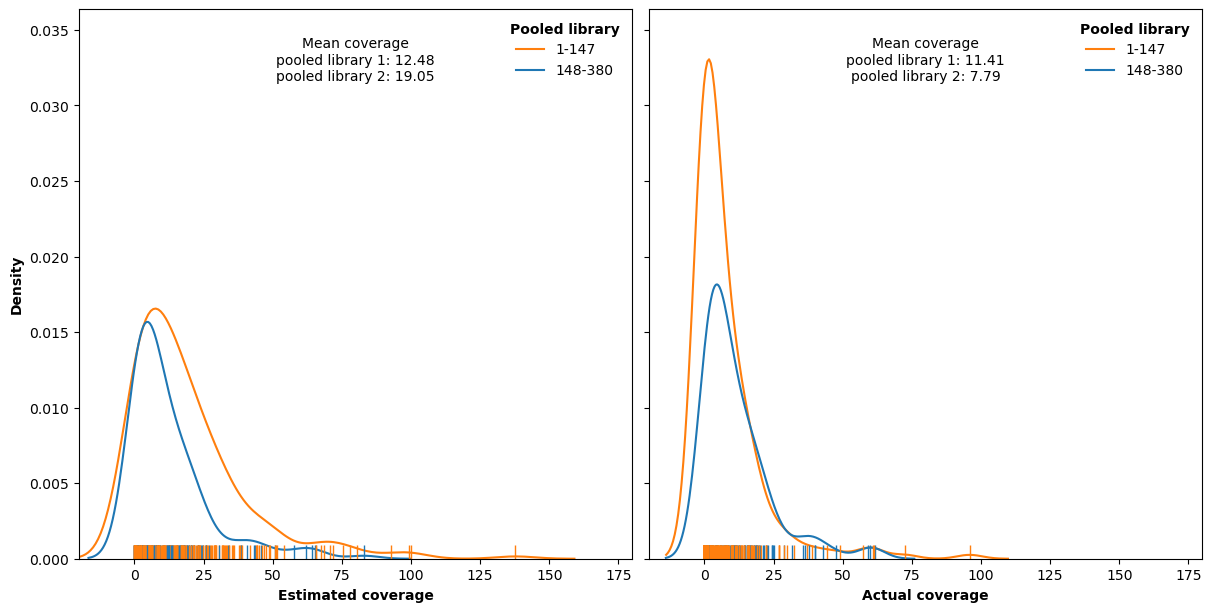

In [44]:
df.loc[(df['Assembly'] <= 147), 'pooled_library'] = '1'
df.loc[(df['Assembly'] > 147), 'pooled_library'] = '2'
df["actual_coverage"] = (df["# left"]*300)/44200000

est_1_avg = df[df["pooled_library"] == "1"]["estimated_coverage"].mean()
est_2_avg = df[df["pooled_library"] == "2"]["estimated_coverage"].mean()
act_1_avg = df[df["pooled_library"] == "1"]["actual_coverage"].mean()
act_2_avg = df[df["pooled_library"] == "2"]["actual_coverage"].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True, layout="constrained")
sns.kdeplot(data=df, x="estimated_coverage", ax=axes[0], hue="pooled_library")
sns.rugplot(data=df, x="estimated_coverage", ax=axes[0], hue="pooled_library")
sns.kdeplot(data=df, x="actual_coverage", ax=axes[1], hue="pooled_library")
sns.rugplot(data=df, x="actual_coverage", ax=axes[1], hue="pooled_library")
axes[0].legend(["1-147", "148-380"], title = 'Pooled library', loc = 'best', frameon = False, title_fontproperties={'weight':"bold"}, markerscale=4)
axes[1].legend(["1-147", "148-380"], title = 'Pooled library', loc = 'best', frameon = False, title_fontproperties={'weight':"bold"}, markerscale=4)
axes[0].set_xlim(-20, 180)
axes[1].set_xlim(-20, 180)
axes[0].set_ylabel("Density", fontproperties={'weight':"bold"})
axes[0].set_xlabel("Estimated coverage", fontproperties={'weight':"bold"})
axes[1].set_xlabel("Actual coverage", fontproperties={'weight':"bold"})
axes[0].text(x=0.5, y=0.95, s=f"Mean coverage\npooled library 1: {round(est_1_avg, 2)}\npooled library 2: {round(est_2_avg, 2)}", ha='center', va='top', transform=axes[0].transAxes)
axes[1].text(x=0.5, y=0.95, s=f"Mean coverage\npooled library 1: {round(act_1_avg, 2)}\npooled library 2: {round(act_2_avg, 2)}", ha='center', va='top', transform=axes[1].transAxes)
plt.savefig("read_coverages.svg", format="svg", bbox_inches='tight')